In [410]:
#Data Analaysis

import numpy as np
import pandas as pd

# for Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

import plotly.io as pio
import warnings

pio.renderers.default = 'iframe' # or 'notebook' or 'colab'
warnings.simplefilter(action = 'ignore',category = Warning)
%matplotlib inline

In [411]:
data = pd.read_csv('data.csv',index_col = 0)

In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [413]:
data.drop(['ID','Photo','Flag','Club Logo','Real Face','Jersey Number','Loaned From'],
          axis=1,inplace=True)


    평균과 중항값 케이스 확인
    
    평균 : 모든 관측값의 합을 자료의 개수로 나눈것
    중앙값 : 전체 관측값을 크기 순서로 배열햇을 때 가운데 위치하는 값
    
    - 평균은 전체 관측값이 골구로 반영 되어있어 대표값으로서 가치가 있다.
    -  평균 근처에 표본이 몰려 있는 상황에서 대표값으로 유용하지만 극단 적 값의 영향을 많이 받는다.
    
    - 중앙값에서 관측값을 크기 순서로 배열할 때 관측값의 위치가 중요하다.
      가운데 위치한 관측값 이외의 관측값들의 크기는 중요하지 않다.
      
      평균과는 달리 중앙값은 관측값에 대해 민감하지 않고 outlier에 대한 영향을 받지 않는다.
      
      충앙값은 표본의 편차 혹은 왜곡이 심하게 나타나는 경우 유용하다.
  


In [414]:
data['International Reputation'].fillna(data['International Reputation'].mean(),inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].mean(),inplace = True)
data['Weak Foot'].fillna(data['Weak Foot'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True) 
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['Acceleration'].fillna(data['Acceleration'].mean(), inplace = True)
data['SprintSpeed'].fillna(data['SprintSpeed'].mean(), inplace = True)
data['Agility'].fillna(data['Agility'].mean(), inplace = True)
data['Reactions'].fillna(data['Reactions'].mean(), inplace = True)
data['Balance'].fillna(data['Balance'].mean(), inplace = True)
data['ShotPower'].fillna(data['ShotPower'].mean(), inplace = True)
data['Jumping'].fillna(data['Jumping'].mean(), inplace = True)
data['Stamina'].fillna(data['Stamina'].mean(), inplace = True)
data['Strength'].fillna(data['Strength'].mean(), inplace = True)
data['LongShots'].fillna(data['LongShots'].mean(), inplace = True)
data['Aggression'].fillna(data['Aggression'].mean(), inplace = True)
data['Interceptions'].fillna(data['Interceptions'].mean(), inplace = True)
data['Positioning'].fillna(data['Positioning'].mean(), inplace = True)
data['Vision'].fillna(data['Vision'].mean(), inplace = True)
data['Penalties'].fillna(data['Penalties'].mean(), inplace = True)
data['Composure'].fillna(data['Composure'].mean(), inplace = True)
data['Marking'].fillna(data['Marking'].mean(), inplace = True)
data['StandingTackle'].fillna(data['StandingTackle'].mean(), inplace = True)
data['SlidingTackle'].fillna(data['SlidingTackle'].mean(), inplace = True)
data['GKDiving'].fillna(data['GKDiving'].mean(), inplace = True)
data['GKHandling'].fillna(data['GKHandling'].mean(), inplace = True)
data['GKKicking'].fillna(data['GKKicking'].mean(), inplace = True)
data['GKPositioning'].fillna(data['GKPositioning'].mean(), inplace = True)
data['GKReflexes'].fillna(data['GKReflexes'].mean(), inplace = True)

In [415]:
'''
isinstance(Value,type) = Value가 type형인지 확인한다.
'''

def value_and_wage_conversion(Value):
    if isinstance(Value,str):
        out = Value.replace('€', '')
        
        if 'M' in out:
            out = float(out.replace('M',''))*1000000
            
        elif 'K' in Value:
            out = float(out.replace('K',''))*1000
        return float(out)
                            

In [416]:
data['Value'] = data['Value'].apply(
    lambda x : value_and_wage_conversion(x)
    )

data['Wage'] = data['Wage'].apply(
    lambda x : value_and_wage_conversion(x)
    )

data['Release Clause'] = data['Release Clause'].apply(
    lambda x : value_and_wage_conversion(x)
    )

In [417]:
data['Release Clause'].fillna(data['Release Clause'].mean(),inplace=True)

In [418]:
#Categorical Columns

data['Club'].fillna('No Club',inplace = True)
data['Position'].fillna('unknown',inplace = True)

In [419]:
data['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [420]:
data['Joined'][2].split(", ")

['Aug 3', '2017']

In [421]:
def setform_date(x):
    
    check_list = list()
    if isinstance(x,str):
        check_list = x.split(", ")
        x = check_list[-1]
    return x

In [422]:
data['Joined'] = data['Joined'].replace(np.nan ,0)

In [423]:
data['Joined'] = data['Joined'].apply(setform_date).astype('str')

In [424]:
import datetime

data['Contract Valid Until'] = pd.to_datetime(data['Contract Valid Until'])

In [425]:
data['year'] = pd.DatetimeIndex(data['Contract Valid Until']).year.astype(str)
data['Contract Valid Until'].fillna('Not abailable',inplace = True)

In [426]:
def clean_height(x):
    check_list = list()
    val = 1
    if isinstance(x,str):
        check_list = x.split("'")
        first = int(check_list[0])
        second = int(check_list[1])
        
        val = ((first*12)+second)/12
       
    return val

In [427]:
data['Height'] = data['Height'].apply(lambda x :clean_height(x))

In [428]:
data['Height'].fillna(data['Height'].mean(),inplace=True)

In [429]:
def clean_weight(x):
    
    if isinstance(x,str):
        return x.replace('lbs','')

In [430]:
data['Weight'] = data['Weight'].apply(
    lambda x : clean_weight(x)
).astype('float')
data['Weight'].fillna((data['Weight'].mean()),inplace = True)

<AxesSubplot:xlabel='Weight', ylabel='Density'>

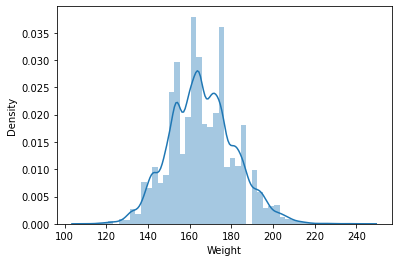

In [431]:
sns.distplot(data['Weight'])

In [432]:
data['Weight'].fillna(data['Weight'],inplace=True)

In [433]:
data['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

In [434]:
#최빈값으로 채움
data['Work Rate'].fillna('Medium/ Medium',inplace = True)

In [435]:
data['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [436]:
data['Preferred Foot'].fillna('Right',inplace = True)

In [437]:
data['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Shaqiri                    1
PLAYER_BODY_TYPE_25        1
Messi                      1
Courtois                   1
Neymar                     1
Akinfenwa                  1
C. Ronaldo                 1
Name: Body Type, dtype: int64

In [438]:

data['Body Type'][data['Body Type'] == 'Neymar'] = 'Lean'
data['Body Type'][data['Body Type'] == 'Courtois'] = 'Lean'
data['Body Type'][data['Body Type'] == 'C. Ronaldo'] = 'Normal'



In [439]:
data['Body Type'][data['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
data['Body Type'][data['Body Type'] == 'Shaqiri'] = 'Stocky'
data['Body Type'][data['Body Type'] == 'Akinfenwa'] = 'Stocky'
data['Body Type'][data['Body Type'] == 'Messi'] = 'Stocky'

In [440]:
data['Body Type'].fillna('Normal',inplace = True)

In [441]:
data['CAM'][0]

'93+2'

In [442]:
def skillConverter(val):
    if isinstance(val,str):
        
        if val is 'Normal':
            return val
        
        first = val[0:2]
        second = val[-1]
        val = int(first)+int(second)
        return val
    else:
        return val

In [443]:
skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

In [444]:
for col in skill_columns:
    data[col] = data[col].apply(skillConverter)
    data[col].fillna(0.0,inplace = True)

In [445]:
def pie_count(check_data, field, percent_limit = 0.5,title = "Number of players by "):
    title += field
    
    check_data = check_data[field].value_counts().to_frame()
    
    total = check_data[field].sum()
    check_data['percentage'] =100*check_data[field]/total
    
    otherdata = check_data[check_data['percentage']<percent_limit]
    others = otherdata['percentage'].sum()
    maindata = check_data[check_data['percentage']>=percent_limit]
    
    check_data = maindata
    other_label = 'Other(<' + str(percent_limit) +"% each)"
    
    check_data.loc[other_label] = pd.Series({field:otherdata[field].sum()})
    
    labels = check_data.index.tolist()
    datavals = check_data[field].tolist()
    
    trace = go.Pie(
        labels = labels,
        values = datavals
    )
    
    layout = go.Layout(
        title = title,
        height = 700
    )
   
    fig = go.Figure(data=[trace],layout = layout)
    fig.show()
    
    

In [446]:

pie_count(data,'Position',0.1)

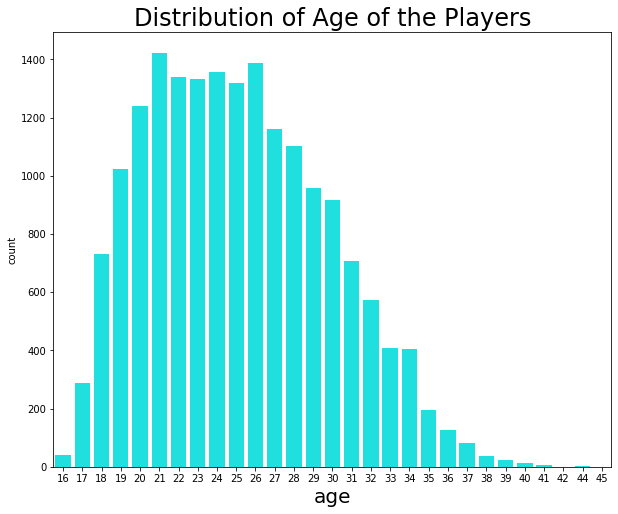

In [447]:
x = data['Age']
plt.figure(figsize = (10,8))

ax = sns.countplot(x,color = '#00ffff')
ax.set_xlabel(xlabel = 'age',fontsize = 20)
ax.set_title(label = "Distribution of Age of the Players",fontsize = 24)
plt.show()

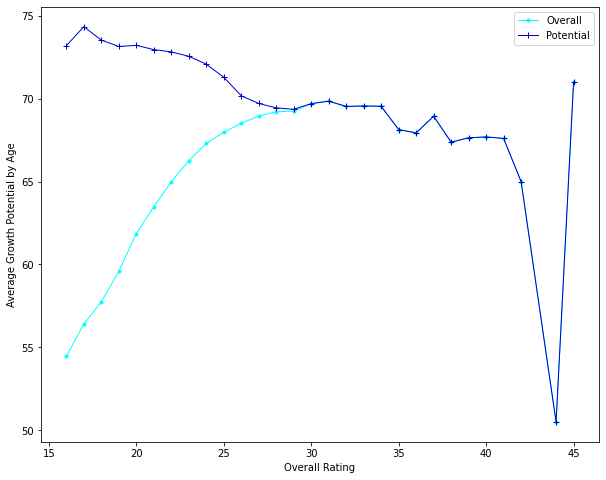

In [448]:
overall = pd.DataFrame(data.groupby(["Age"])['Overall'].mean())
potential = pd.DataFrame(data.groupby(["Age"])['Potential'].mean())

merged = pd.merge(overall,potential,on = 'Age',how = 'inner')
merged['Age'] = merged.index
fig, ax = plt.subplots(figsize = (10,8))
merged.reset_index(drop = True,inplace = True)

plt.plot('Age', 'Overall', data=merged, marker='.', color='#00ffff', lw=1, label ="Overall" )
plt.plot('Age', 'Potential', data=merged, marker='+', color='#0000cc', lw=1, label = "Potential")
plt.xlabel('Overall Rating')
plt.ylabel('Average Growth Potential by Age')
plt.legend();

In [449]:
club = data.groupby('Club')['Value'].mean().reset_index().sort_values('Value', ascending=True).tail(20)
fig = px.bar(club, x="Value", y="Club", orientation='h')
fig.show()

In [450]:
clubs = data.groupby('Club')['Overall'].mean().reset_index().sort_values('Overall',ascending = False).head(20)
fig = px.bar(clubs, x="Overall", y="Club", orientation='h')
fig.show()

In [451]:
#Feature engine

nation_count = data['Nationality'].value_counts()
nation_list = nation_count[nation_count>250].index.tolist()

def Nation(df):
    
    if df["Nationality"] in nation_list:
        return 1
    else:
        return 0


In [452]:
data["Nationality"] = data.apply(
    lambda x : Nation(x),
    axis = 1
)

In [453]:
def change_foot(x):
    if x['Preferred Foot'] == "Right":
        return 1
    else:
        return 0
    
data["Preferred Foot"] = data.apply(
    lambda x: change_foot(x),
    axis = 1
)

In [454]:
def simple_position(df):
    if (df == 'GK'):
        return 'GK'
    elif ((df == 'RB') | (df == 'LB') | (df == 'CB') | (df == 'LCB') | (df == 'RCB') | (df == 'RWB') | (df == 'LWB') ):
        return 'DF'
    elif ((df == 'LDM') | (df == 'CDM') | (df == 'RDM')):
        return 'DM'
    elif ((df == 'LM') | (df == 'LCM') | (df == 'CM') | (df == 'RCM') | (df == 'RM')):
        return 'MF'
    elif ((df == 'LAM') | (df == 'CAM') | (df == 'RAM') | (df == 'LW') | (df == 'RW')):
        return 'AM'
    elif ((df == 'RS') | (df == 'ST') | (df == 'LS') | (df == 'CF') | (df == 'LF') | (df == 'RF')):
        return 'ST'
    else:
        return df
    
data["Position"] = data["Position"].apply(
    lambda x : simple_position(x)
)

In [455]:
data["Position"].value_counts()

DF         5866
MF         4399
ST         2667
GK         2025
AM         1751
DM         1439
unknown      60
Name: Position, dtype: int64

In [456]:
teample = data["Work Rate"].str.split("/ ", n = 1, expand = True)
data["WorkRate1"] = teample[0]
data['WorkRate2'] = teample[1]

In [457]:
data.drop(['Name','Club','Wage','Work Rate','Joined',
          'Contract Valid Until','Release Clause','year'],axis=1,inplace=True)

In [458]:
def mapping_data(df =None, feature=None):
    
    unique = df[feature].unique()
    mapping_data = dict()
    
    for val,key in enumerate(unique):
        mapping_data[key] = val
        
    
    return df[feature].map(mapping_data)

In [459]:
data["Body Type"]= mapping_data(data,'Body Type')

In [460]:
data["Position"]= mapping_data(data,'Position')

In [461]:
data['WorkRate1'] = mapping_data(data,"WorkRate1")

In [462]:
data['WorkRate2'] = mapping_data(data,"WorkRate2")

In [463]:
X = data[['Age','Overall', 'Potential','Special','International Reputation', 'Weak Foot', 
          'Skill Moves', 'Height', 'Weight','Crossing', 'Finishing', 'HeadingAccuracy', 
          'ShortPassing', 'Volleys','Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 
          'BallControl','Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
          'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
          'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
          'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
          'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
          'Nationality', 'Preferred Foot']]
y = np.log1p(data['Value'])

<AxesSubplot:xlabel='Value'>

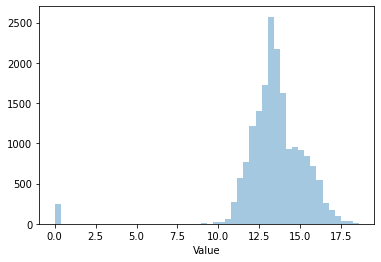

In [464]:
sns.distplot(y,kde=False)

In [465]:
yidx = y[y>7].index
x = X.loc[yidx]
y = y[y>7]

In [466]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
x_norm = MinMaxScaler().fit_transform(x)

sel_ = SelectFromModel(Lasso(alpha=.0001, random_state=42)) 
sel_.fit(x_norm, y)

SelectFromModel(estimator=Lasso(alpha=0.0001, random_state=42))

In [469]:
selected_feat = x.columns[(sel_.get_support())]

In [471]:
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 45
selected features: 35
features with coefficients shrank to zero: 10


In [472]:
x_model = x[selected_feat]


In [473]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_model, y, test_size=0.3, random_state=42)

In [474]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

In [475]:
def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    r2 = r2_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}, r2 = {:,.2f}'.format(rmse, evs, r2))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [476]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [477]:
model = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("lin_reg", Lasso(alpha=0.01))
    ))

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

In [479]:
y_train_pred

array([11.2879038 , 13.130823  , 12.11326145, ..., 14.21698102,
       16.19892746, 11.09887369])

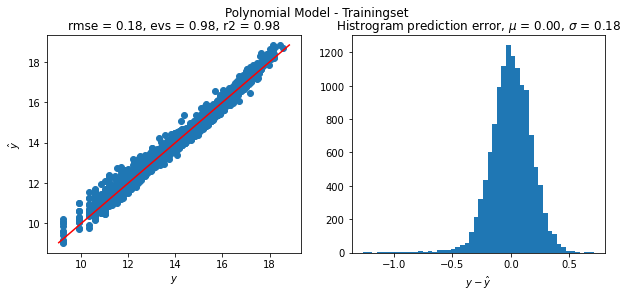

In [480]:
plot_prediction_analysis(y_train, y_train_pred, title='Polynomial Model - Trainingset')